In [20]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np

# Read PCAP file using Scapy
packets = rdpcap('data/pcap/2024-dataset1/2024data_00000_20240101120000')

# Extract packet information
packet_data = []
for packet in packets:
    if 'IP' in packet:
        try:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet)
            }
            packet_data.append(packet_info)

        except IndexError:
            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': None,
                'Destination Port': None,
                'Timestamp': packet.time,
                'Packet Size': len(packet)
            }
            packet_data.append(packet_info)

# Convert to Pandas DataFrame
df = pd.DataFrame(packet_data)

# Drop rows with NaN or None values
df_cleaned = df.dropna()

df_cleaned

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
0,138.77.78.189,133.228.163.72,TCP,60042.0,60000.0,1704085200.154523,58
1,185.72.152.109,150.95.99.215,UDP,34737.0,443.0,1704085200.154539,58
2,150.95.0.162,117.108.194.199,TCP,443.0,56743.0,1704085200.15454,54
5,38.186.29.190,163.93.233.130,TCP,8883.0,62913.0,1704085200.154578,54
6,185.114.41.182,163.93.99.62,TCP,60689.0,22.0,1704085200.154584,54
...,...,...,...,...,...,...,...
4208,203.141.138.107,103.221.22.137,TCP,873.0,37068.0,1704085200.195153,66
4209,101.158.232.70,157.174.232.5,UDP,52189.0,443.0,1704085200.195154,58
4210,133.251.157.235,54.37.215.143,TCP,53912.0,443.0,1704085200.19516,66
4211,103.132.254.160,202.197.88.34,UDP,20464.0,53.0,1704085200.195184,54


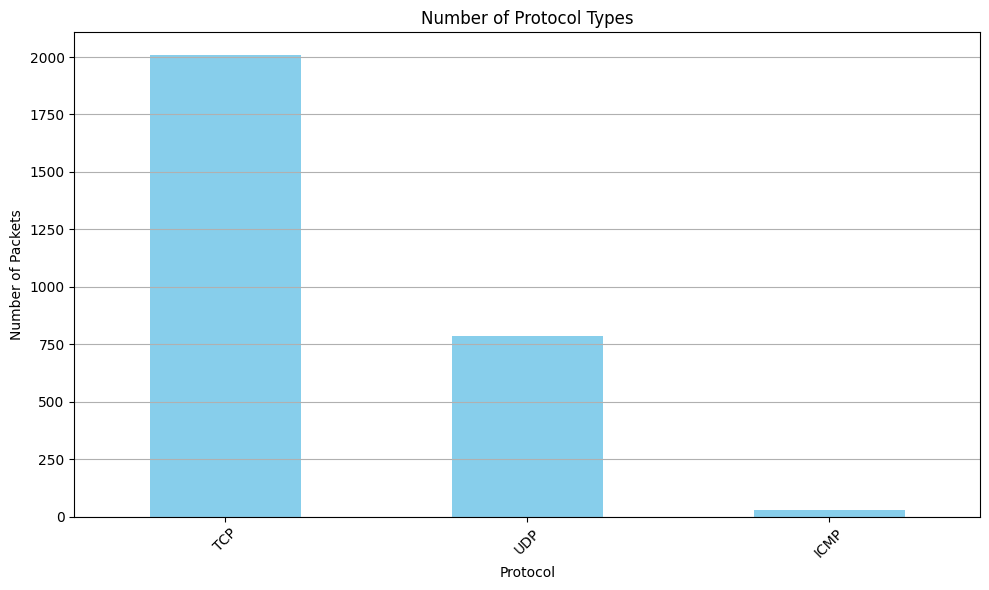

In [9]:
# Visualizing the number of packets of each protocol type

# Count the number of packets for each protocol
protocol_counts = df_cleaned['Protocol'].value_counts()

# Plot the number of protocol types
plt.figure(figsize=(10, 6))
protocol_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Protocol Types')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
# Extracting only the TCP packets
tcp_df = df_cleaned[df_cleaned['Protocol'] == 'TCP']
tcp_df = tcp_df.reset_index(drop=True)

tcp_df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
0,138.77.78.189,133.228.163.72,TCP,60042.0,60000.0,1704085200.154523,58
1,150.95.0.162,117.108.194.199,TCP,443.0,56743.0,1704085200.15454,54
2,38.186.29.190,163.93.233.130,TCP,8883.0,62913.0,1704085200.154578,54
3,185.114.41.182,163.93.99.62,TCP,60689.0,22.0,1704085200.154584,54
4,157.174.18.145,144.66.254.210,TCP,62574.0,8080.0,1704085200.154597,54
...,...,...,...,...,...,...,...
2002,185.47.148.134,150.95.63.94,TCP,37609.0,30007.0,1704085200.19512,54
2003,60.249.157.134,150.95.0.162,TCP,62985.0,443.0,1704085200.195132,54
2004,192.105.43.51,203.141.143.26,TCP,443.0,54554.0,1704085200.195145,54
2005,203.141.138.107,103.221.22.137,TCP,873.0,37068.0,1704085200.195153,66


In [15]:
# Finding the number of packets sent between each source and destination
packet_counts = tcp_df.groupby(
    ['Source IP', 'Destination IP']).size().reset_index(name='Packet Count')

# Sorting by descending order of source and desination packets
packet_counts_sorted = packet_counts.sort_values(
    by='Packet Count', ascending=False)

packet_counts_sorted

,Source IP,Destination IP,Packet Count
564,216.100.199.237,150.95.0.162,117
101,129.239.9.55,150.95.110.212,84
719,52.198.12.253,150.95.182.197,74
425,185.130.78.90,150.95.0.162,71
186,150.95.172.72,218.80.88.241,61
...,...,...,...
347,167.249.122.146,163.93.82.222,1
348,167.249.122.148,133.228.42.206,1
349,167.249.122.149,150.95.208.206,1
350,167.249.122.150,163.93.173.204,1


In [16]:
# Define the source and destination IP addresses you want to filter for
source_ip = '216.100.199.237'
destination_ip = '150.95.0.162'

# Filter DataFrame for rows with specific source and destination IP addresses
filtered_rows = tcp_df[(tcp_df['Source IP'] == source_ip) & (
    tcp_df['Destination IP'] == destination_ip)]

filtered_rows

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
199,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.159438,66
205,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.159539,66
411,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.163491,66
412,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.163494,66
413,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.163524,66
...,...,...,...,...,...,...,...
1135,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.177888,66
1159,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.178399,66
1160,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.178403,66
1165,216.100.199.237,150.95.0.162,TCP,873.0,49948.0,1704085200.178518,66


/tmp/ipykernel_17849/1939786121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Interarrival Time'] = filtered_rows['Timestamp'].diff()


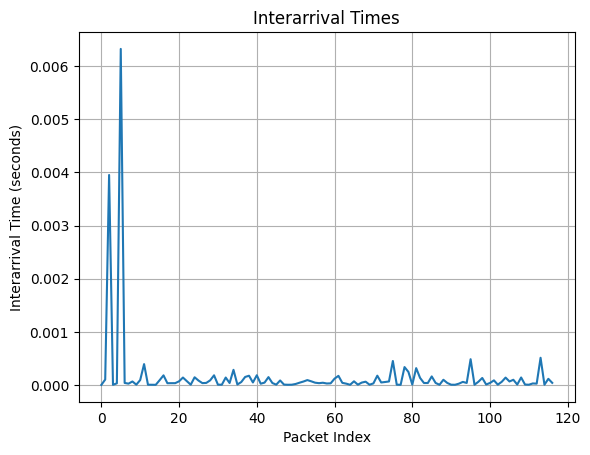

In [19]:
# Calculate packet interarrival time
filtered_rows['Interarrival Time'] = filtered_rows['Timestamp'].diff()

# Set the first interarrival time to be 0
filtered_rows.at[filtered_rows.index[0], 'Interarrival Time'] = 0

# Reset index
filtered_rows.reset_index(drop=True, inplace=True)

# Plot the interarrival times
plt.plot(filtered_rows['Interarrival Time'])
plt.title('Interarrival Times')
plt.xlabel('Packet Index')
plt.ylabel('Interarrival Time (seconds)')
plt.grid(True)
plt.show()

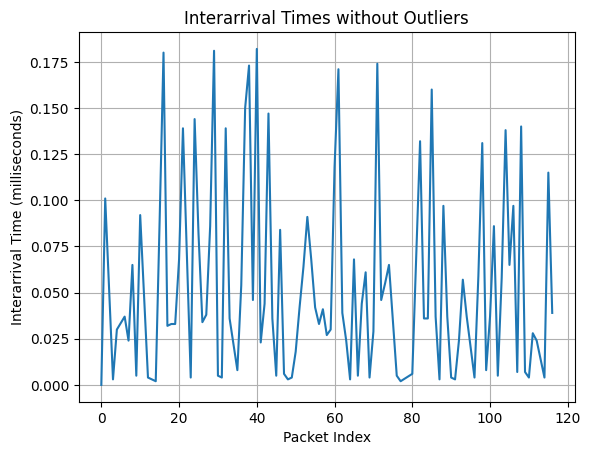

In [23]:
# Calculate interquartile range (IQR)
Q1 = filtered_rows['Interarrival Time'].quantile(0.25)
Q3 = filtered_rows['Interarrival Time'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_rows_no_outliers = filtered_rows[(filtered_rows['Interarrival Time'] >= lower_bound) & (
    filtered_rows['Interarrival Time'] <= upper_bound)]

# Plot the interarrival times without outliers
plt.plot(filtered_rows_no_outliers['Interarrival Time'] * 1000)
plt.title('Interarrival Times without Outliers')
plt.xlabel('Packet Index')
plt.ylabel('Interarrival Time (milliseconds)')
plt.grid(True)
plt.show()